In [1]:
# Notebook header for loading packages

import os
from jarvis.tools.slme import SolarCell

vasp_bulk_exe /users/knc6/VASP/vasp54/src/vasp.5.4.1Dobby/bin/vasp_std
vasp_surf_exe /users/knc6/VASP/vasp54/src/vasp.5.4.1Dobbynoz/bin/vasp_std
vasp_nw_exe /users/knc6/VASP/vasp54/src/vasp.5.4.1Dobbynoxy/bin/vasp_ncl
vasp_soc_exe /users/knc6/VASP/vasp54/src/vasp.5.4.1Dobby/bin/vasp_ncl
vasp_vdw_dat /users/knc6/bin/vdw_kernel.bindat
lammps_exec ~/Software/LAMMPS/lammps-master/src/lmp_serial
VASP_PSP_DIR /users/knc6/VASP/VASP-POTENTIAL
MAPI_KEY ''
data_json /users/knc6/bin/all_mp.json
ncores 24
nnodes 8
mem 1500
walltime 148:12:00
input_nobox /users/knc6/inelast_nobox.mod
input_box /users/knc6/inelast.mod
mp_cmd mpirun


# Influence of the onset of the absorption spectrum on the SLME

In this notebook, we'll take a quick look a the influence of the onset of the absorption spectrum on the final result for the SLME, as well as the thickness dependence. Of particular interest are the comparison with the shockley-queisser limit, as the small onset can have a significant influence on the SLME as the thickness increases, and as such remove the possibility of crossing the shockley-queisser limit, as we found to be possible in our CuAu-like paper. The basic idea is that because the recombination current is calculated from the combination of the absorptivity and the temperature-dependent blackbody spectrum:

$$
J_0^r = e \pi \int_0^\infty a(E) \Phi_{bb} (E, T) dE
$$

Let's stick to the radiative limit for now, i.e. $J_0=J_0^r$. In case there is an earlier onset of the absorptivity $a(E)$, this will increase the recombination current, which is clear from the integral above. There are several ways to obtain an onset of the absorptivity below the band gap:

* Smearing (or smoothening, whatever you want to call it) of the imaginary part of the dielectric function because of the complex integration used in the Kramer-Kronig transformation in VASP. When performing the Kramers-Kronig transformation, the imaginary part of the dielectric function is overwritten by the smeared version. After this step, there is the following piece of code in the `linear_optics.F` file:<br><br>
```
2244 ! this line overwrites the imaginary part by the original data
2245 ! passed to the subroutine
2246 ! the option is usually selected if the complex shift is small,
2247 ! since in this case the KK transformation above yields inaccurate results
2248 ! for the imaginary part
2249 ! however, this, option can not be used if the input data is already complex
2250 ! values
2251       IF (ABS(CSHIFT) < DELTAE .AND. .NOT. LCOPY) THEN
2252          LWARN=.TRUE.
2253       ENDIF
2254       IF (ABS(CSHIFT) < DELTAE .AND. LCOPY) THEN
2255          EPS_REAL=CMPLX(REAL(EPS_REAL,q),REAL(EPSDD,q))
2256       ENDIF
2257 
2258       EPSDD=EPS_REAL
```
<br>
Simply put, this piece of code once again overwrites the imaginary part of the dielectric function with the original one calculated from the matrix elements 
(line 2255), on two conditions: The CSHIFT value is smaller than the spacing of the energy mesh and there are no significant imaginary parts in the original imaginary part of the dielectric function.<br><br>
* Using smearing in order to aid the k-point convergence. The influence of this smearing will of course depend on the amount of smearing used.
* Interpolation of the energy grid. If the band gap is in between two energy grid points (which is usually the case), and the distance between the grid point is significantly large, the interpolation of the absorptivity can lead to a small but significant onset below the bandgap.

Let's take a closer look at the various onset-related errors for the SLME calculation.

## CSHIFT

First let's compare the difference between the 



In [2]:
cuinse2_lowc_n2000 = SolarCell.from_file(os.path.join(os.getcwd(), "data", "lowc_nedos2000.xml"))

/Users/mbercx/miniconda3/envs/my_jarvis/lib/python3.6/site-packages/pymatgen/io/vasp/outputs.py:155: UserWarning: Float overflow (*******) encountered in vasprun
  warnings.warn('Float overflow (*******) encountered in vasprun')
/Users/mbercx/miniconda3/envs/my_jarvis/lib/python3.6/site-packages/pymatgen/io/vasp/outputs.py:880: UserWarning: No POTCAR file with matching TITEL fields was found in /Users/mbercx/Dropbox/python/jupyter/slme_analysis/data
  " was found in {}".format(os.path.abspath(p)))


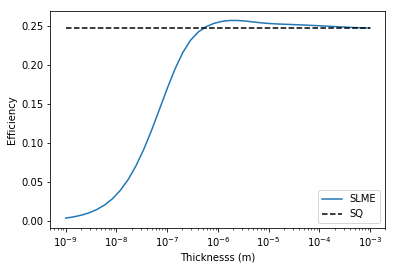

In [3]:
cuinse2_lowc_n2000.plot_slme_vs_thickness(temperature=298.15)